# Afrobeats Recommender

# EDA

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### Import Ankita's Playlist

In [187]:
ankita= pd.read_csv('../data/ankita.csv')
ankita.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,068HSvCf5MbQfhV4qqaelg,"Haan Main Galat (From ""Love Aaj Kal"")",Pritam,{'external_urls': {'spotify': 'https://open.sp...,1wRPtKGflJrBx9BmLsSwlU,84,"['desi pop', 'filmi', 'indian instrumental', '...","Haan Main Galat (From ""Love Aaj Kal"")",62,2020-01-29,...,0.893,117.979,audio_features,068HSvCf5MbQfhV4qqaelg,spotify:track:068HSvCf5MbQfhV4qqaelg,https://api.spotify.com/v1/tracks/068HSvCf5MbQ...,https://api.spotify.com/v1/audio-analysis/068H...,218644,4,ankita
1,2aHz87L2Z4a0ZEQ7vMlH8z,Badal Pe Paon Hai,Salim–Sulaiman,{'external_urls': {'spotify': 'https://open.sp...,6ohaQzKaXrobAL8paLSaxq,64,"['desi pop', 'filmi', 'indian folk', 'modern b...",Chak De India,55,2007-08-01,...,0.869,104.999,audio_features,2aHz87L2Z4a0ZEQ7vMlH8z,spotify:track:2aHz87L2Z4a0ZEQ7vMlH8z,https://api.spotify.com/v1/tracks/2aHz87L2Z4a0...,https://api.spotify.com/v1/audio-analysis/2aHz...,243931,4,ankita


In [188]:
ankita.shape

(8, 29)

In [189]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),49,2010-09-21,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364.0,5.0,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,43,2011-04-08,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107.0,4.0,afrobeats


In [190]:
afrobeats.shape

(1874, 29)

In [191]:
df = pd.concat([afrobeats, ankita])

In [192]:
df.reset_index(inplace=True, drop=True)

In [193]:
df.head()

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,{'external_urls': {'spotify': 'https://open.sp...,1sSt1DqqqFLkPwfrqafVyn,54,"['afro dancehall', 'afropop', 'azontobeats', '...",Oleku (feat. Brymo),49,2010-09-21,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364.0,5.0,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,{'external_urls': {'spotify': 'https://open.sp...,37zb1JQnDV9dRLatrASEj1,29,"['afro dancehall', 'azonto', 'hiplife']",Move Back,43,2011-04-08,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107.0,4.0,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,{'external_urls': {'spotify': 'https://open.sp...,3tVQdUvClmAT7URs9V3rsp,80,"['afro dancehall', 'afropop', 'azonto', 'niger...",Superstar,47,2011-07-01,...,0.967,119.990,audio_features,5YgyvTZmdkIfFOnj8ri8mZ,spotify:track:5YgyvTZmdkIfFOnj8ri8mZ,https://api.spotify.com/v1/tracks/5YgyvTZmdkIf...,https://api.spotify.com/v1/audio-analysis/5Ygy...,212006.0,4.0,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,{'external_urls': {'spotify': 'https://open.sp...,520qA5VGL9iI0SbmEnTVNg,60,"['afro dancehall', 'afropop', 'azontobeats', '...",The Matter (feat. Wizkid),47,2013-03-10,...,0.808,103.070,audio_features,2cWdhA4ZDBvYuHRKKIPT3k,spotify:track:2cWdhA4ZDBvYuHRKKIPT3k,https://api.spotify.com/v1/tracks/2cWdhA4ZDBvY...,https://api.spotify.com/v1/audio-analysis/2cWd...,198058.0,4.0,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,{'external_urls': {'spotify': 'https://open.sp...,0LFsP7WPfu5inz9a1amcE4,51,"['afro dancehall', 'afropop', 'azonto', 'azont...",Refuse to Be Broke: Da Revolution 2,51,2014,...,0.704,135.550,audio_features,4voOsb8qpJ569JaMiGAyrl,spotify:track:4voOsb8qpJ569JaMiGAyrl,https://api.spotify.com/v1/tracks/4voOsb8qpJ56...,https://api.spotify.com/v1/audio-analysis/4voO...,261547.0,5.0,afrobeats


In [194]:
features = ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#### Quick clustering to see how the different genres seperate out 

In [195]:
X = df[features]

In [196]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=200))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

In [197]:
df[df['cluster']==6]

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
901,7GJcwc79aepayf4gR25XhG,LIKE IT,Amaarae,{'external_urls': {'spotify': 'https://open.sp...,21UPYSRWFKwtqvSAnFnSvS,73,"['afro r&b', 'ghanaian alternative', 'ghanaian...",LIKE IT,47,2019-09-26,...,91.016,audio_features,7GJcwc79aepayf4gR25XhG,spotify:track:7GJcwc79aepayf4gR25XhG,https://api.spotify.com/v1/tracks/7GJcwc79aepa...,https://api.spotify.com/v1/audio-analysis/7GJc...,236720.0,4.0,afrobeats,6
1458,0bHVQDfkxCU4JOTIRBbNgR,Obsessed,Fave,{'external_urls': {'spotify': 'https://open.sp...,4wAqlYtTaaHELEgyCh9KjG,57,"['alte', 'nigerian pop']",Riddim 5,54,2022-01-20,...,95.028,audio_features,0bHVQDfkxCU4JOTIRBbNgR,spotify:track:0bHVQDfkxCU4JOTIRBbNgR,https://api.spotify.com/v1/tracks/0bHVQDfkxCU4...,https://api.spotify.com/v1/audio-analysis/0bHV...,164211.0,4.0,afrobeats,6


#### Using PCA reduce the features into 2 dimentions for better visualization

In [198]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [199]:
pipeline_pca.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [200]:
pca_df=pd.DataFrame(pipeline_pca.transform(X), columns=['x','y'])

In [201]:
pca_df['cluster'] = df['cluster']
pca_df['genre'] = df['genre']

<AxesSubplot:xlabel='x', ylabel='y'>

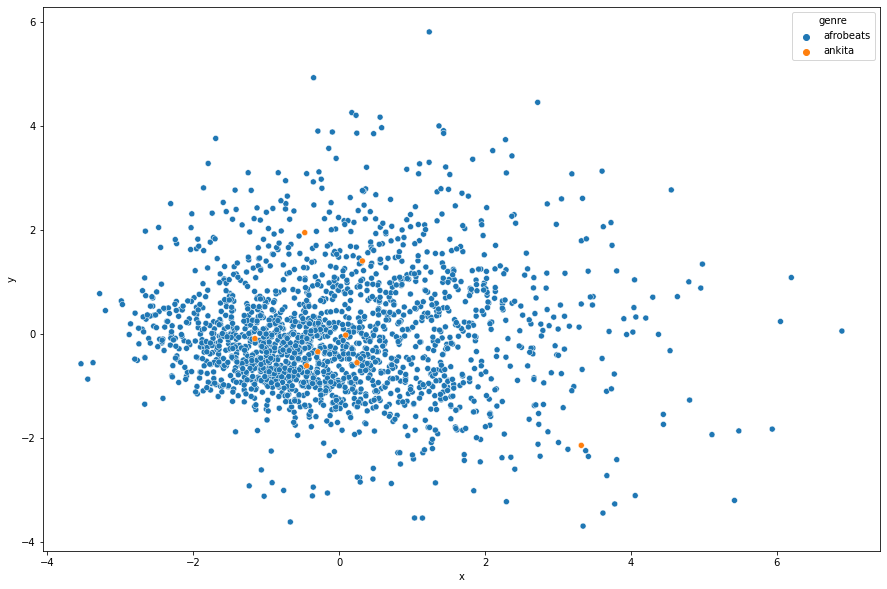

In [202]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=pca_df['x'], y=pca_df['y'], hue=pca_df['genre'])

In [203]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=False))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [204]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,5.193997,-43.122936,afrobeats,62,Oleku (feat. Brymo)
1,7.624844,28.604368,afrobeats,72,Move Back
2,-15.540648,31.337345,afrobeats,128,Pakurumo
3,-11.271356,20.089903,afrobeats,133,The Matter (feat. Wizkid)
4,21.498400,-30.198112,afrobeats,138,Slow Down (feat. Wiz Kid)


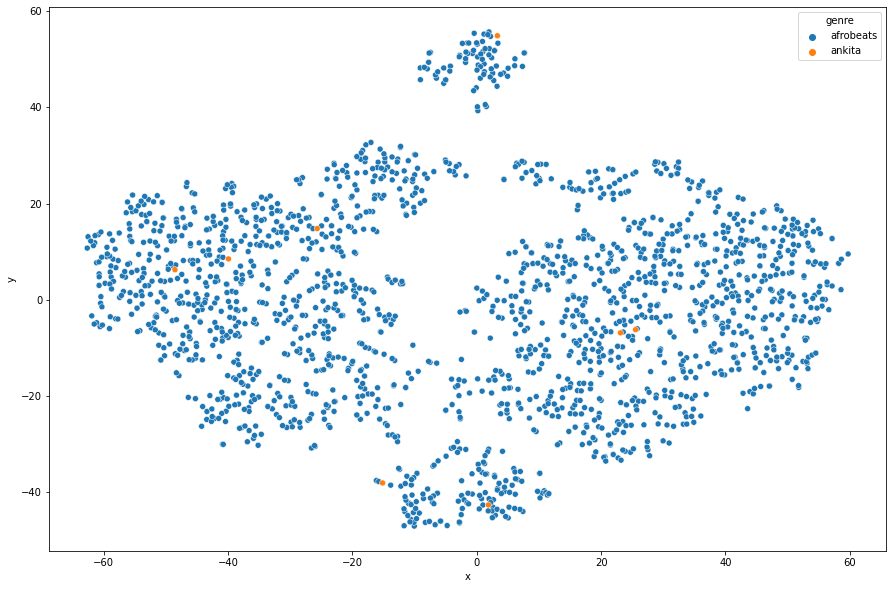

In [205]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['genre']);

#### This function gives the songs in each cluster

In [206]:
tsne_df[tsne_df['genre']=='ankita']

,x,y,genre,cluster,track_name
1874,-48.534298,6.255311,ankita,146,"Haan Main Galat (From ""Love Aaj Kal"")"
1875,-39.926197,8.501411,ankita,27,Badal Pe Paon Hai
1876,25.542164,-6.223330,ankita,35,Ziddi Dil
1877,1.879568,-42.666069,ankita,12,Dangal
1878,-25.658306,14.807876,ankita,119,Pray For Me (with Kendrick Lamar)
1879,-15.145137,-38.090443,ankita,137,Blinding Lights
1880,3.321868,54.904694,ankita,144,RAINY NIGHT IN TALLINN
1881,23.116064,-6.877306,ankita,35,Zinda


In [207]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [208]:
def get_song(df,title):
    cluster = df.loc[df['track_name'] == title, 'cluster'].iloc[0]
    lst=[]
    for i in range(len(df)):
        if df.loc[i]['cluster'] == cluster:
            lst.append(df.loc[i]['track_name'])
    return lst, cluster

## Cosine similarity

In [209]:
X.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.544,0.730,-4.299,0.0,0.1440,0.344,0.000001,0.140,0.751,162.112
1,0.793,0.734,-9.252,0.0,0.0981,0.323,0.000002,0.777,0.793,125.032
2,0.879,0.737,-5.412,1.0,0.0421,0.525,0.005760,0.268,0.967,119.990
3,0.697,0.841,-6.782,1.0,0.2710,0.224,0.000000,0.336,0.808,103.070
4,0.520,0.717,-3.006,0.0,0.3890,0.116,0.000000,0.249,0.704,135.550


In [210]:
similarities = cosine_similarity(X)

In [211]:
similarities

array([[1.        , 0.99885823, 0.99977449, ..., 0.9999434 , 0.99762504,
        0.99917263],
       [0.99885823, 1.        , 0.99953946, ..., 0.99917993, 0.99969244,
        0.99996123],
       [0.99977449, 0.99953946, 1.        , ..., 0.99990238, 0.99870536,
        0.99971158],
       ...,
       [0.9999434 , 0.99917993, 0.99990238, ..., 1.        , 0.99818375,
        0.99944682],
       [0.99762504, 0.99969244, 0.99870536, ..., 0.99818375, 1.        ,
        0.99954636],
       [0.99917263, 0.99996123, 0.99971158, ..., 0.99944682, 0.99954636,
        1.        ]])

In [212]:
recommender_df = pd.DataFrame(similarities,
                              columns=df['track_name'],
                             index=df['track_name']).drop(ankita['track_name'])

In [213]:
recommender_df.head(3)

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,Le temps,Ozumba Mbadiwe - Remix,"Haan Main Galat (From ""Love Aaj Kal"")",Badal Pe Paon Hai,Ziddi Dil,Dangal,Pray For Me (with Kendrick Lamar),Blinding Lights,RAINY NIGHT IN TALLINN,Zinda
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,0.998858,0.999774,0.999164,0.999987,0.999251,0.999216,0.998757,0.999778,0.999933,...,0.999259,0.998616,0.999726,0.997845,0.998789,0.999997,0.999672,0.999943,0.997625,0.999173
Move Back,0.998858,1.000000,0.999539,0.999910,0.998647,0.999889,0.999903,0.999984,0.997677,0.998740,...,0.999942,0.999966,0.999611,0.999785,0.999979,0.998952,0.999628,0.999180,0.999692,0.999961
Pakurumo,0.999774,0.999539,1.000000,0.999779,0.999683,0.999807,0.999798,0.999463,0.999186,0.999790,...,0.999769,0.999382,0.999988,0.998925,0.999490,0.999806,0.999962,0.999902,0.998705,0.999712


#### Create a function to predict top ten Afrobeats songs based on the playlist given

In [214]:
recommender_df['Zinda'].sort_values(ascending=False).index[0:10]

Index(['Who Dey Eat', 'Blow My Mind', 'Yawa (feat. Sarkodie)',
       'Ginger (feat. Burna Boy)', 'Know Your Worth (feat. Davido & Tems)',
       'Let It Go - DJ Boat Remix', 'Abena', 'Bounce It', 'Jabole',
       'Ogaranya'],
      dtype='object', name='track_name')

In [215]:
def recommend_afrobeats(track_names):
    top_ten_df = pd.DataFrame(columns=df.columns)
    top_ten_list = []
    
    #Get song from users playlis
    for track in track_names:
        
        
        for count in range(len(df)): 
            most_similar = recommender_df[track].sort_values(ascending=False).index[count]
            
            #check if song has already been recommended
            if most_similar in top_ten_list:
                continue
            
            else:
                top_ten_list.append(most_similar)
                break
                
        #create a dataframe of the recommended songs
        top_ten_df = pd.concat([top_ten_df, df[df['track_name']==most_similar]])
        
    return top_ten_df

In [216]:
recommend_afrobeats(ankita['track_name'])

,track_uri,track_name,artist_name,artist_info,artist_uri,artist_popularity,artist_genre,album,track_pop,year_released,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
1682,0VgfzD2X7It9z04N9gpOTK,Aku Shika,Kuami Eugene,{'external_urls': {'spotify': 'https://open.sp...,0GGKrcPOlBkmBzQDf2Ogkl,57,"['asakaa', 'azontobeats']",Rockstar,25,2018-12-15,...,130.06,audio_features,0VgfzD2X7It9z04N9gpOTK,spotify:track:0VgfzD2X7It9z04N9gpOTK,https://api.spotify.com/v1/tracks/0VgfzD2X7It9...,https://api.spotify.com/v1/audio-analysis/0Vgf...,214615.0,4.0,afrobeats,7
309,79P1sxrpp1phhTgF1gkaI8,Italy (feat. Blaq Diamond),BNXN fka Buju,{'external_urls': {'spotify': 'https://open.sp...,3zaDigUwjHvjOkSn0NDf9x,71,['nigerian pop'],Italy (feat. Blaq Diamond),64,2021-12-23,...,112.969,audio_features,79P1sxrpp1phhTgF1gkaI8,spotify:track:79P1sxrpp1phhTgF1gkaI8,https://api.spotify.com/v1/tracks/79P1sxrpp1ph...,https://api.spotify.com/v1/audio-analysis/79P1...,188395.0,4.0,afrobeats,141
1096,5IBkCmsOADHUFpow9kf9GB,Understanding Love - Extended,DarkoVibes,{'external_urls': {'spotify': 'https://open.sp...,5a3kizlLAxR0P6qZEti8T8,47,"['azonto', 'ghanaian alternative', 'ghanaian h...",Understanding Love (Extended),20,2021-05-21,...,95.987,audio_features,5IBkCmsOADHUFpow9kf9GB,spotify:track:5IBkCmsOADHUFpow9kf9GB,https://api.spotify.com/v1/tracks/5IBkCmsOADHU...,https://api.spotify.com/v1/audio-analysis/5IBk...,240600.0,4.0,afrobeats,35
753,5xuiSfuLAJyaSqxocf3O17,My Darlina,King Perryy,{'external_urls': {'spotify': 'https://open.sp...,2Srxd4jkUb5hcZEJO1SPnW,41,['nigerian pop'],My Darlina,29,2020-02-07,...,194.228,audio_features,5xuiSfuLAJyaSqxocf3O17,spotify:track:5xuiSfuLAJyaSqxocf3O17,https://api.spotify.com/v1/tracks/5xuiSfuLAJya...,https://api.spotify.com/v1/audio-analysis/5xui...,180000.0,4.0,afrobeats,93
529,398G0odwKJ892uyEYDlMBh,Onyeka (Baby),Burna Boy,{'external_urls': {'spotify': 'https://open.sp...,3wcj11K77LjEY1PkEazffa,79,"['afro dancehall', 'dancehall', 'nigerian hip ...",Twice As Tall,51,2020-08-13,...,102.03,audio_features,398G0odwKJ892uyEYDlMBh,spotify:track:398G0odwKJ892uyEYDlMBh,https://api.spotify.com/v1/tracks/398G0odwKJ89...,https://api.spotify.com/v1/audio-analysis/398G...,202147.0,4.0,afrobeats,48
1002,7wXT3Oc16Q629MOZHKl3NJ,Lady,Arrzy,{'external_urls': {'spotify': 'https://open.sp...,69WZ1pz2CpbDspDTOY8fEY,9,[],Lady,23,2022-02-11,...,194.057,audio_features,7wXT3Oc16Q629MOZHKl3NJ,spotify:track:7wXT3Oc16Q629MOZHKl3NJ,https://api.spotify.com/v1/tracks/7wXT3Oc16Q62...,https://api.spotify.com/v1/audio-analysis/7wXT...,202268.0,4.0,afrobeats,166
1386,5BYCsDKV8ulLKdEYXsoHur,Sugar Daddy,DJ Enimoney,{'external_urls': {'spotify': 'https://open.sp...,7nEYJ01WxrTl3kAklzEC61,27,[],Sugar Daddy,33,2021-04-06,...,114.005,audio_features,5BYCsDKV8ulLKdEYXsoHur,spotify:track:5BYCsDKV8ulLKdEYXsoHur,https://api.spotify.com/v1/tracks/5BYCsDKV8ulL...,https://api.spotify.com/v1/audio-analysis/5BYC...,153684.0,4.0,afrobeats,113
1792,0Rhn8sbadn3pXK0xP9fyXt,Sugar Daddy,KiDi,{'external_urls': {'spotify': 'https://open.sp...,14PimM6ohO2gYftuwTam9V,60,"['azontobeats', 'ghanaian pop']",Sugar,26,2019-05-31,...,99.989,audio_features,0Rhn8sbadn3pXK0xP9fyXt,spotify:track:0Rhn8sbadn3pXK0xP9fyXt,https://api.spotify.com/v1/tracks/0Rhn8sbadn3p...,https://api.spotify.com/v1/audio-analysis/0Rhn...,190200.0,4.0,afrobeats,128
1799,680lETWgYaHdQt8847XsvV,Who Dey Eat,Shaker,{'external_urls': {'spotify': 'https://open.sp...,5I1G1MSxXh3zrZsVZCPzZj,11,[],Who Dey Eat,22,2019-08-28,...,140.009,audio_features,680lETWgYaHdQt8847XsvV,spotify:track:680lETWgYaHdQt8847XsvV,https://api.spotify.com/v1/tracks/680lETWgYaHd...,https://api.spotify.com/v1/audio-analysis/680l...,246857.0,4.0,afrobeats,36
